In [256]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#loading the image
img = cv2.imread('coins2.png')

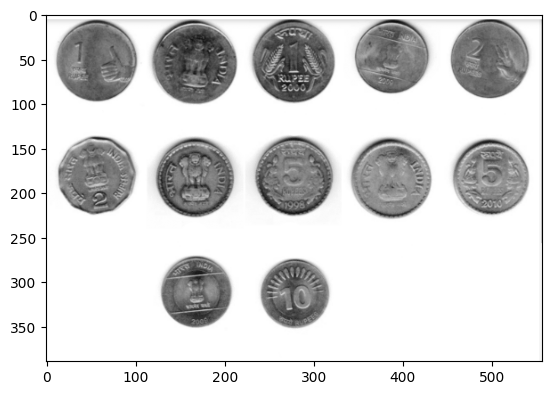

In [257]:
#grayscaling the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

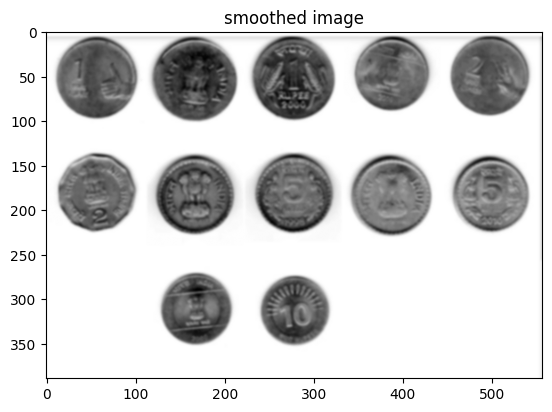

In [258]:
#Gaussian smoothing
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blur, cmap='gray')
plt.title('smoothed image')
plt.show()

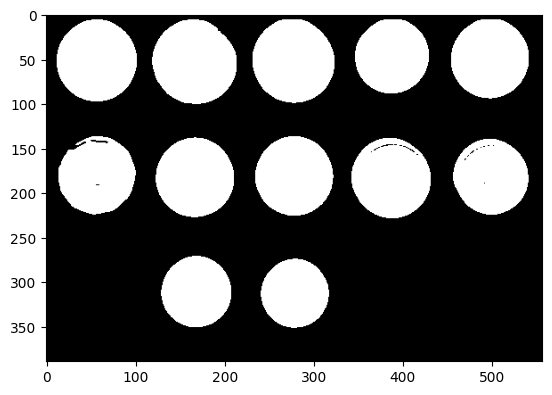

In [259]:
# Apply Otsu's thresholding for better binarization
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
# Morphological closing to fill small gaps
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)


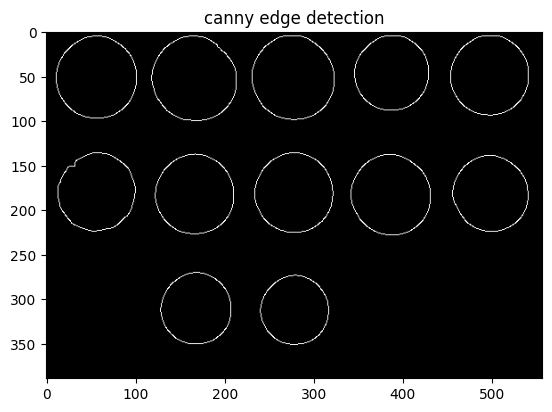

In [260]:
#canny edge detection
edges = cv2.Canny(cleaned, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title('canny edge detection')
plt.show()

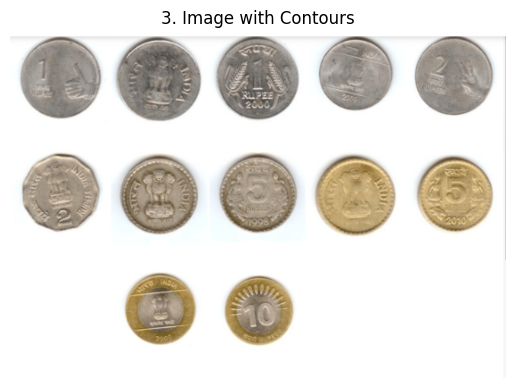

In [261]:
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create a copy of the original image to draw contours on
contour_image = img.copy()
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('3. Image with Contours')
plt.axis('off')
plt.show()


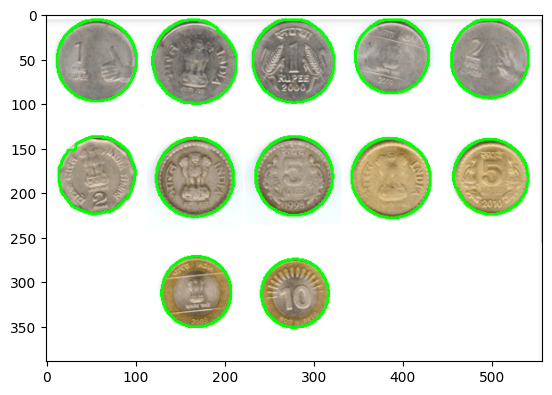

In [262]:
(cnt, heirarchy) = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

plt.imshow(rgb)

Segmented Coin 1:


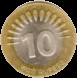

Segmented Coin 2:


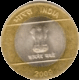

Segmented Coin 3:


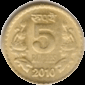

Segmented Coin 4:


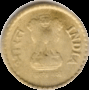

Segmented Coin 5:


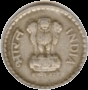

Segmented Coin 6:


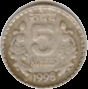

Segmented Coin 7:


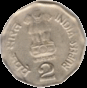

Segmented Coin 8:


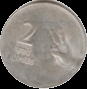

Segmented Coin 9:


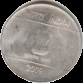

Segmented Coin 10:


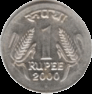

Segmented Coin 11:


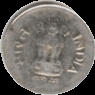

Segmented Coin 12:


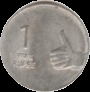

In [263]:
#segmentation

def segment_coins(contours, image):
    segmented_coins = []
    for cnt in contours:
        area = cv2.contourArea(cnt)

        # Adjust area limits to include smaller coins
        if 500 < area < 25000:
            # Convex hull to ensure smooth coin boundaries
            hull = cv2.convexHull(cnt)
            mask = np.zeros_like(gray)
            cv2.drawContours(mask, [hull], -1, 255, thickness=cv2.FILLED)

            # Extract coin using the refined mask
            coin_segment = cv2.bitwise_and(image, image, mask=mask)

            # Crop to bounding box
            x, y, w, h = cv2.boundingRect(hull)
            cropped_coin = coin_segment[y:y+h, x:x+w]
            segmented_coins.append(cropped_coin)

    # Display segmented coins
    for i, coin in enumerate(segmented_coins):
        print(f"Segmented Coin {i+1}:")
        cv2_imshow(coin)

    return segmented_coins

# Run segmentation
# image_path = "coins1.png"  # Replace with your image path
segmented_coins = segment_coins(contours, img)


Segmented Coin 1:


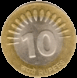

Segmented Coin 2:


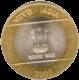

Segmented Coin 3:


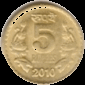

Segmented Coin 4:


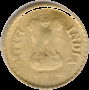

Segmented Coin 5:


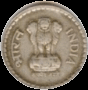

Segmented Coin 6:


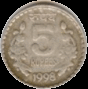

Segmented Coin 7:


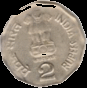

Segmented Coin 8:


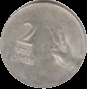

Segmented Coin 9:


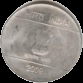

Segmented Coin 10:


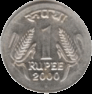

Segmented Coin 11:


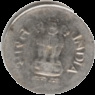

Segmented Coin 12:


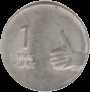

In [264]:
#segmentation using region growing method
def region_growing_segmentation(thresh, image):
    # Create a mask with 2 extra pixels in height & width
    h, w = thresh.shape
    mask = np.zeros((h+2, w+2), np.uint8)

    # Select a valid seed point inside a coin
    seed_point = (w//2, h//2)  # Start from the center

    # Region growing using floodFill
    cv2.floodFill(thresh, mask, seed_point, 255)

    # Bitwise AND to extract segmented regions
    segmented = cv2.bitwise_and(image, image, mask=thresh)

    # Find contours of segmented coins
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    segmented_coins = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cropped_coin = segmented[y:y+h, x:x+w]
        segmented_coins.append(cropped_coin)

    # Display each segmented coin
    for i, coin in enumerate(segmented_coins):
        print(f"Segmented Coin {i+1}:")
        cv2_imshow(coin)

    return segmented_coins

# Run segmentation
image_path = "coins2.png"  # Replace with your image
segmented_coins = region_growing_segmentation(thresh, img)


In [265]:
print(f"Total coins detected: {len(segmented_coins)}")

Total coins detected: 12
